## RabattCorner

In [46]:
from fastai.tabular import *

### Dataset

Read dataset

In [47]:
PATH='./'

In [48]:
table_names = ['test']

In [49]:
tables = [pd.read_csv(f'{PATH}{fname}.csv', low_memory=False) for fname in table_names]

In [50]:
df = tables[0]

In [51]:
df.head()

,start_year,start_month,user_id,signup_year,signup_month,postal0,postal1,postal2,postal3,gender,language,birthday,partner_id,previous_visit_count,sum_amount
0,2019,2,1,2012,12,8.0,0.0,5.0,5.0,1.0,1,1984.0,7,2,0.0
1,2019,2,1,2012,12,8.0,0.0,5.0,5.0,1.0,1,1984.0,12,0,0.0
2,2019,2,1,2012,12,8.0,0.0,5.0,5.0,1.0,1,1984.0,16,1,0.0
3,2019,2,1,2012,12,8.0,0.0,5.0,5.0,1.0,1,1984.0,19,0,0.0
4,2019,2,1,2012,12,8.0,0.0,5.0,5.0,1.0,1,1984.0,20,11,0.0


### Remove NAN values

Next we'll fill in missing values to avoid complications with NA's. NA (not available) is how Pandas indicates missing values; many models have problems when missing values are present, so it's always important to think about how to deal with them. In these cases, we are picking an arbitrary signal value that doesn't otherwise appear in the data.

In [52]:
df['postal0'] = df.postal0.fillna(-1)
df['postal1'] = df.postal1.fillna(-1)
df['postal2'] = df.postal2.fillna(-1)
df['postal3'] = df.postal3.fillna(-1)
df['gender'] = df.gender.fillna(0)
df['birthday'] = df.birthday.fillna(1000)

In [53]:
df.isnull().values.any()

False

In [54]:
dep_var = 'sum_amount'
cat_names = ['start_year', 'start_month', 'user_id', 'signup_year', 'signup_month', 'postal0', 'postal1', 'postal2', 'postal3', 'gender', 'language', 'birthday', 'partner_id']
cont_names = ['previous_visit_count']
procs = [FillMissing, Categorify, Normalize]

In [55]:
len(df)

2027535

Validation set

In [56]:
df.iloc[1972465:2000000]

,start_year,start_month,user_id,signup_year,signup_month,postal0,postal1,postal2,postal3,gender,language,birthday,partner_id,previous_visit_count,sum_amount
1972465,2019,2,40161,2018,9,6.0,3.0,0.0,0.0,1.0,1,1000.0,419,0,0.0
1972466,2019,2,40161,2018,9,6.0,3.0,0.0,0.0,1.0,1,1000.0,423,0,0.0
1972467,2019,2,40161,2018,9,6.0,3.0,0.0,0.0,1.0,1,1000.0,431,0,0.0
1972468,2019,2,40161,2018,9,6.0,3.0,0.0,0.0,1.0,1,1000.0,433,0,0.0
1972469,2019,2,40161,2018,9,6.0,3.0,0.0,0.0,1.0,1,1000.0,435,0,0.0
1972470,2019,2,40161,2018,9,6.0,3.0,0.0,0.0,1.0,1,1000.0,436,1,0.0
1972471,2019,2,40161,2018,9,6.0,3.0,0.0,0.0,1.0,1,1000.0,440,0,0.0
1972472,2019,2,40161,2018,9,6.0,3.0,0.0,0.0,1.0,1,1000.0,446,0,0.0
1972473,2019,2,40161,2018,9,6.0,3.0,0.0,0.0,1.0,1,1000.0,449,0,0.0
1972474,2019,2,40161,2018,9,6.0,3.0,0.0,0.0,1.0,1,1000.0,460,0,0.0


Test set:

In [57]:
df.iloc[2000000:]

,start_year,start_month,user_id,signup_year,signup_month,postal0,postal1,postal2,postal3,gender,language,birthday,partner_id,previous_visit_count,sum_amount
2000000,2019,2,41717,2018,10,9.0,4.0,3.0,6.0,1.0,1,1992.0,700,0,0.0
2000001,2019,2,41717,2018,10,9.0,4.0,3.0,6.0,1.0,1,1992.0,701,0,0.0
2000002,2019,2,41717,2018,10,9.0,4.0,3.0,6.0,1.0,1,1992.0,702,0,0.0
2000003,2019,2,41717,2018,10,9.0,4.0,3.0,6.0,1.0,1,1992.0,704,0,0.0
2000004,2019,2,41717,2018,10,9.0,4.0,3.0,6.0,1.0,1,1992.0,707,0,0.0
2000005,2019,2,41717,2018,10,9.0,4.0,3.0,6.0,1.0,1,1992.0,710,0,0.0
2000006,2019,2,41717,2018,10,9.0,4.0,3.0,6.0,1.0,1,1992.0,712,0,0.0
2000007,2019,2,41717,2018,10,9.0,4.0,3.0,6.0,1.0,1,1992.0,713,0,0.0
2000008,2019,2,41717,2018,10,9.0,4.0,3.0,6.0,1.0,1,1992.0,716,0,0.0
2000009,2019,2,41717,2018,10,9.0,4.0,3.0,6.0,1.0,1,1992.0,717,0,0.0


In [58]:
val_idx = list(range(1972465, 2000000))

In [59]:
val_idx[0]

1972465

In [60]:
val_idx[-1]

1999999

In [61]:
df.iloc[val_idx]

,start_year,start_month,user_id,signup_year,signup_month,postal0,postal1,postal2,postal3,gender,language,birthday,partner_id,previous_visit_count,sum_amount
1972465,2019,2,40161,2018,9,6.0,3.0,0.0,0.0,1.0,1,1000.0,419,0,0.0
1972466,2019,2,40161,2018,9,6.0,3.0,0.0,0.0,1.0,1,1000.0,423,0,0.0
1972467,2019,2,40161,2018,9,6.0,3.0,0.0,0.0,1.0,1,1000.0,431,0,0.0
1972468,2019,2,40161,2018,9,6.0,3.0,0.0,0.0,1.0,1,1000.0,433,0,0.0
1972469,2019,2,40161,2018,9,6.0,3.0,0.0,0.0,1.0,1,1000.0,435,0,0.0
1972470,2019,2,40161,2018,9,6.0,3.0,0.0,0.0,1.0,1,1000.0,436,1,0.0
1972471,2019,2,40161,2018,9,6.0,3.0,0.0,0.0,1.0,1,1000.0,440,0,0.0
1972472,2019,2,40161,2018,9,6.0,3.0,0.0,0.0,1.0,1,1000.0,446,0,0.0
1972473,2019,2,40161,2018,9,6.0,3.0,0.0,0.0,1.0,1,1000.0,449,0,0.0
1972474,2019,2,40161,2018,9,6.0,3.0,0.0,0.0,1.0,1,1000.0,460,0,0.0


In [62]:
test = TabularList.from_df(df.iloc[2000000:].copy(), path=PATH, cat_names=cat_names, cont_names=cont_names)

In [63]:
data = (TabularList.from_df(df, path=PATH, cat_names=cat_names, cont_names=cont_names, procs=procs)
                           .split_by_idx(val_idx)
                           .label_from_df(cols=dep_var, label_cls=FloatList)
                           .add_test(test)
                           .databunch())

In [64]:
data.show_batch(rows=10)

start_year,start_month,user_id,signup_year,signup_month,postal0,postal1,postal2,postal3,gender,language,birthday,partner_id,previous_visit_count,target
2019,2,253,2013,6,8.0,3.0,2.0,0.0,1.0,1,1984.0,136,-0.0899,0.0
2019,2,4077,2015,3,8.0,1.0,0.0,5.0,1.0,1,1000.0,573,-0.0899,0.0
2019,2,34610,2018,4,4.0,5.0,6.0,2.0,1.0,1,1000.0,809,-0.0899,0.0
2019,2,15618,2017,2,3.0,3.0,6.0,0.0,2.0,1,1000.0,145,-0.0899,0.0
2019,2,23851,2017,11,5.0,4.0,3.0,0.0,2.0,1,1958.0,346,-0.0899,0.0
2019,2,14733,2017,2,9.0,2.0,1.0,3.0,2.0,1,1967.0,691,-0.0899,0.0
2019,2,4415,2015,5,-1.0,-1.0,-1.0,-1.0,1.0,1,1000.0,689,-0.0899,0.0
2019,2,10326,2016,6,6.0,4.0,1.0,0.0,2.0,1,1000.0,138,-0.0899,0.0
2019,2,3799,2015,1,4.0,1.0,4.0,2.0,1.0,1,1000.0,751,-0.0899,0.0
2019,2,20217,2017,9,-1.0,-1.0,-1.0,-1.0,2.0,1,1000.0,829,-0.0899,0.0


In [65]:
max_log_y = np.log(np.max(df['sum_amount'])*1.2)
y_range = torch.tensor([0, max_log_y], device=defaults.device)

In [74]:
#learn = tabular_learner(data, layers=[200,100], metrics=accuracy)
#learn = tabular_learner(data, layers=[200,100])

learn = tabular_learner(data, layers=[1000,500], ps=[0.001,0.01], emb_drop=0.04, 
                        y_range=y_range)

In [75]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


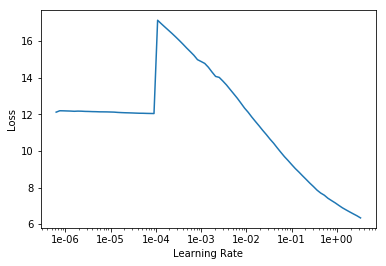

In [76]:
learn.recorder.plot()

In [77]:
learn.fit_one_cycle(5, 1e-3, wd=0.2)

epoch,train_loss,valid_loss,time
0,0.653482,3.598084,04:42
1,0.124344,3.568264,04:38
2,0.154841,3.610647,04:37
3,0.319117,3.587593,04:38
4,0.499512,3.596132,04:38


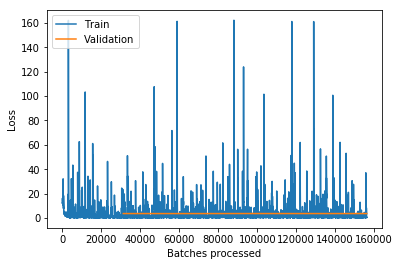

In [79]:
learn.recorder.plot_losses()

In [80]:
learn.get_preds()

[tensor([[0.0953],
         [0.0515],
         [0.0866],
         ...,
         [0.0517],
         [0.0515],
         [0.0507]]), tensor([0., 0., 0.,  ..., 0., 0., 0.])]